In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")

# 条件式多图

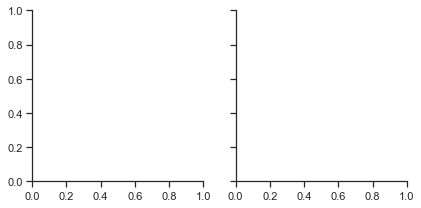

In [2]:
tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, col="time")

传入数据和维度变量名称会初始化一个网格，其中生成了基于matplotlib的图形和坐标轴，但是不会在这些坐标轴中画任何东西（因为我们还没告诉它们画什么）

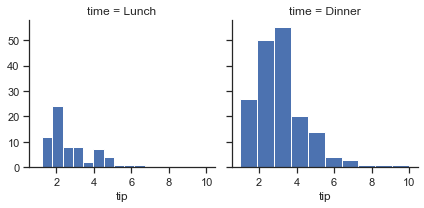

In [3]:
g = sns.FacetGrid(tips, col="time")
g.map(plt.hist, "tip");


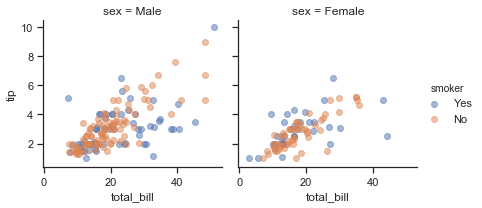

In [4]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=0.5)
g.add_legend();

有很多选项可以传递给FacetGrid的构造函数，用以控制网格的样式：

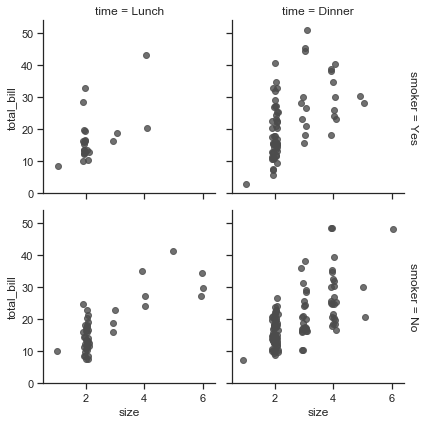

In [5]:
g = sns.FacetGrid(tips, row="smoker", col="time",margin_titles=True)
g.map(sns.regplot, "size", "total_bill", color=".3", fit_reg=False, x_jitter=.1)

图的大小是通过每张子图的高度和宽高比来控制的：

D:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


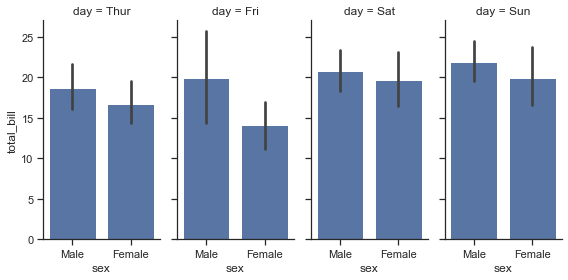

In [6]:
g = sns.FacetGrid(tips, col="day", height=4, aspect=.5)
g.map(sns.barplot, "sex", "total_bill");

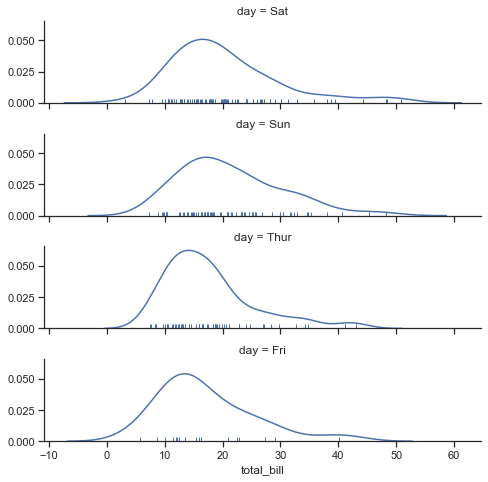

In [7]:
ordered_days = tips.day.value_counts().index
g = sns.FacetGrid(tips, row="day", row_order=ordered_days, height=1.7, aspect=4)
g.map(sns.distplot, "total_bill", hist=False, rug=True);

指定某个seaborn调色板

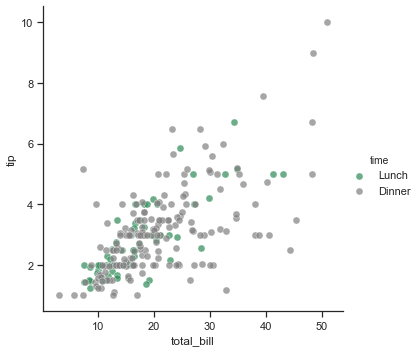

In [8]:
pal = dict(Lunch="seagreen", Dinner="gray")
g = sns.FacetGrid(tips, hue="time", palette=pal, height=5)
g.map(plt.scatter, "total_bill", "tip", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();


控制hue变量的不同水平展示出来的其他样式

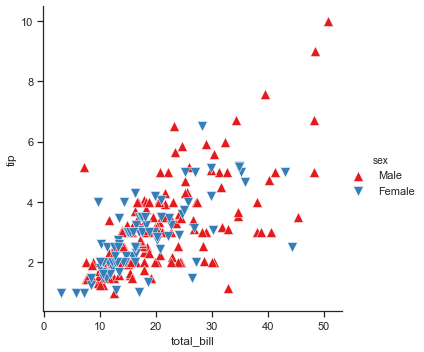

In [9]:
g = sns.FacetGrid(tips, hue="sex", palette="Set1", height=5, hue_kws={"marker": ["^", "v"]})
g.map(plt.scatter, "total_bill", "tip", s=100, linewidth=.5, edgecolor="white")
g.add_legend();


如果某个维度变量（用于col/row/hue参数的变量，之后不再说明）具有非常多的水平（level：取值），我们可以把它们分布到不同的列，然后把它们“折叠”到不同的行中。当我们使用这种操作时，我们不能设置row变量。

D:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


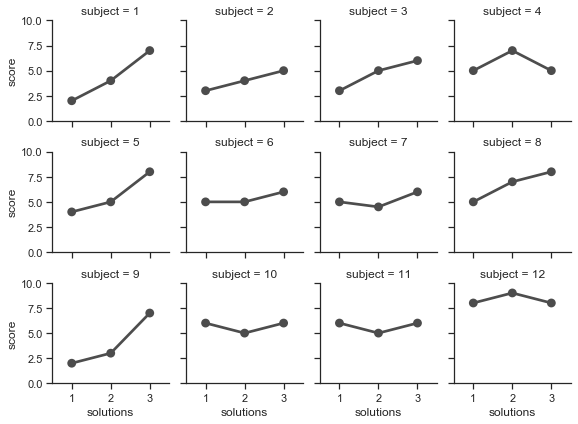

In [10]:
attend = sns.load_dataset("attention").query("subject <= 12")
g = sns.FacetGrid(attend, col="subject", col_wrap=4, height=2, ylim=(0, 10))
g.map(sns.pointplot, "solutions", "score", color=".3", ci=None);


设置坐标轴

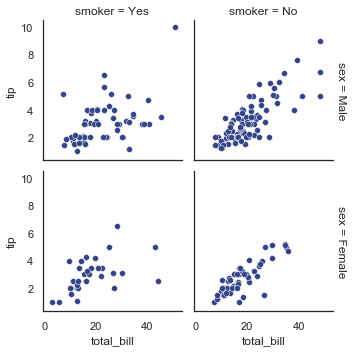

In [12]:
with sns.axes_style("white"):
    g = sns.FacetGrid(tips, row="sex", col="smoker", margin_titles=True, height=2.5)
g.map(plt.scatter, "total_bill", "tip", color="#334488", edgecolor="white", lw=.5);
g.set_axis_labels("Total bill (US Dollars)", "Tip");
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10]);
g.fig.subplots_adjust(wspace=.02, hspace=.02);


# 展示成对关系

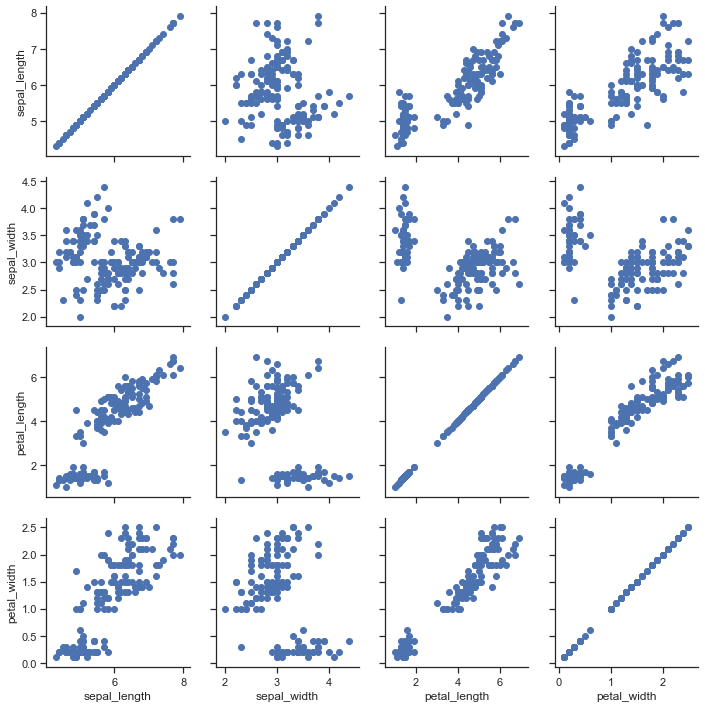

In [13]:
iris = sns.load_dataset("iris")
g = sns.PairGrid(iris)
g.map(plt.scatter);


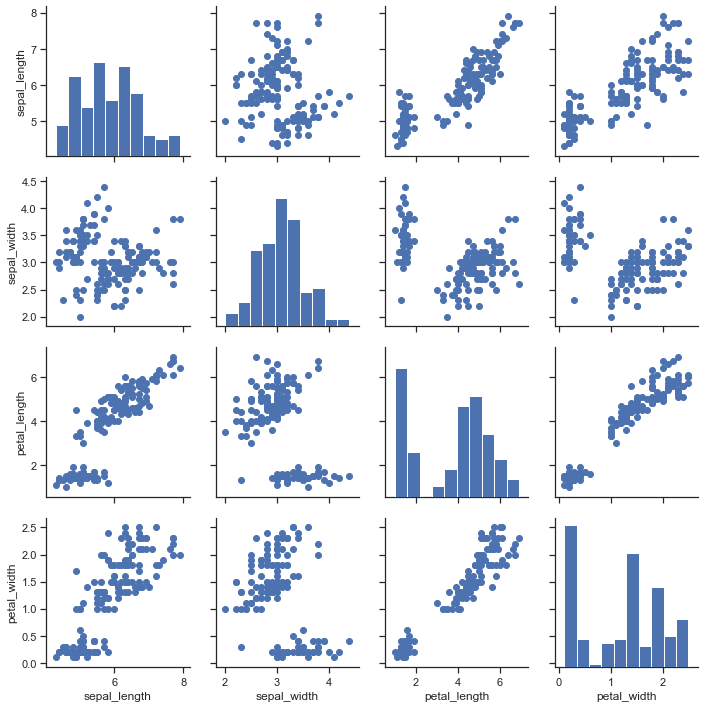

In [14]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

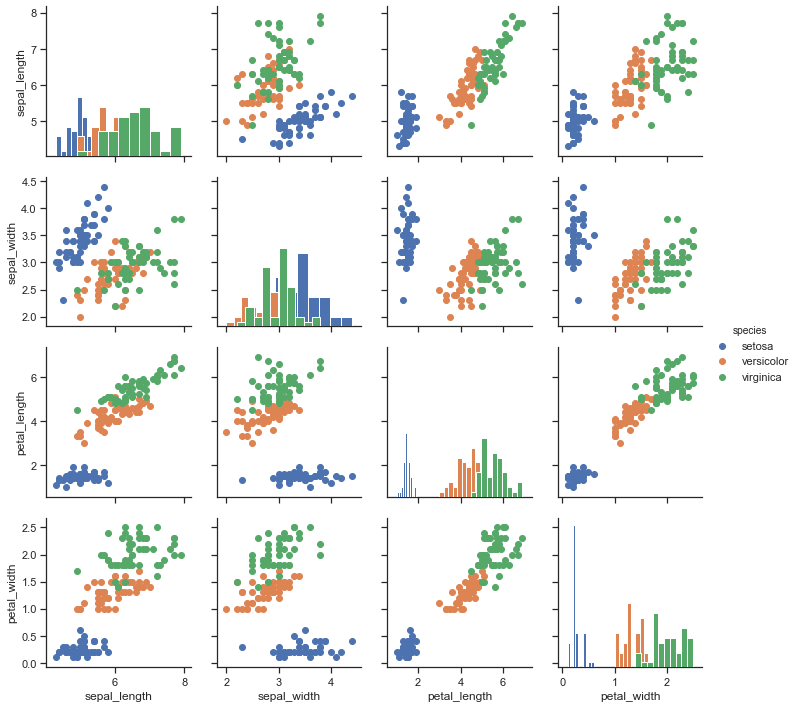

In [15]:
g = sns.PairGrid(iris, hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();


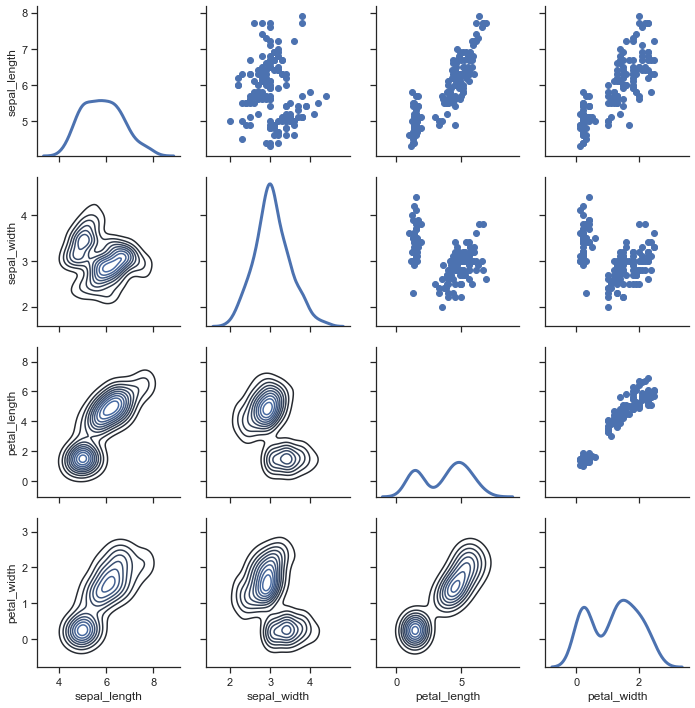

In [16]:
g = sns.PairGrid(iris)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False);
